# Model Building using the Trigram dataset

In this notebook different models are trained and evaluated with the **tf-idf Trigram** vectorized dataset. All the models have been evaluated and the metrics that evaluated these model are tabulated in the end.

--------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = pd.read_csv('encoded_tri_tfidf.csv')
x

,application server process,business process security,code report lower,core connector worker,create custom report,day day support,day support workday,declaration declare information,eib core connector,experience currently work,...,true best knowledge,use application designer,use object transporter,use report writer,use workday studio,work experience work,work workday consultant,workday report writer,xslt code report,year experience peoplesoft
0,0.435804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.389234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.148054,0.200462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.510296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262811
3,0.160998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.165834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.628634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.323757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.000000,0.000000,0.183918,0.189442,0.174132,0.174132,0.174132,0.000000,0.000000,0.0,...,0.000000,0.000000,0.189442,0.183918,0.174132,0.000000,0.000000,0.378884,0.178837,0.000000
75,0.000000,0.208736,0.000000,0.000000,0.191867,0.191867,0.191867,0.000000,0.187041,0.0,...,0.000000,0.000000,0.000000,0.202650,0.191867,0.208736,0.208736,0.000000,0.197051,0.000000
76,0.000000,0.155528,0.150993,0.311055,0.000000,0.000000,0.000000,0.000000,0.278726,0.0,...,0.000000,0.000000,0.311055,0.000000,0.285918,0.000000,0.155528,0.155528,0.146821,0.000000
77,0.000000,0.165504,0.160678,0.000000,0.152129,0.152129,0.152129,0.000000,0.148302,0.0,...,0.000000,0.000000,0.000000,0.160678,0.000000,0.000000,0.000000,0.000000,0.156239,0.000000


In [3]:
y = pd.read_csv('targets.csv', index_col = 0)
y

,Category
0,PeopleSoft Developer
1,PeopleSoft Developer
2,PeopleSoft Developer
3,PeopleSoft Developer
4,PeopleSoft Developer
...,...
74,Work_Day Developer
75,Work_Day Developer
76,Work_Day Developer
77,Work_Day Developer


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [5]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y_enc, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape

((63, 37), (16, 37))

## KNN Classifier

In [7]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.52
Accuracy of  test set    : 0.50
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         3
           3       0.38      0.75      0.50         4

    accuracy                           0.50        16
   macro avg       0.41      0.47      0.42        16
weighted avg       0.44      0.50      0.45        16




## Decision Tree Classifier

In [8]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.94
Accuracy of  test set    : 0.75
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.56      1.00      0.71         5
           2       1.00      0.33      0.50         3
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.89      0.71      0.72        16
weighted avg       0.86      0.75      0.73        16




## Random Forest Classifier

In [9]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.94
Accuracy of  test set    : 0.75
Classification report for classifier RandomForestClassifier(n_estimators=200):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.56      1.00      0.71         5
           2       1.00      0.33      0.50         3
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.89      0.71      0.72        16
weighted avg       0.86      0.75      0.73        16




## Support Vector Classifier

In [10]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.90
Accuracy of  test set    : 0.88
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      0.85        16




## Logisitic Regression Classifier

In [11]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.87
Accuracy of  test set    : 0.88
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      0.85        16




## Bagging Classifier

In [12]:
model_bagg = BaggingClassifier(DecisionTreeClassifier()## KNN Classifier, max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.76
Accuracy of  test set    : 0.81
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4

    accuracy                           0.81        16
   macro avg       0.91      0.77      0.78        16
weighted avg       0.88      0.81      0.80        16




## AdaBoost Classifier

In [13]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.54
Accuracy of  test set    : 0.44
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.36      1.00      0.53         5
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         4

    accuracy                           0.44        16
   macro avg       0.34      0.38      0.30        16
weighted avg       0.36      0.44      0.33        16




## Gradient Boosting Classifier

In [14]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  te## KNN Classifierst set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.94
Accuracy of  test set    : 0.75
Classification report for classifier GradientBoostingClassifier(max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.56      1.00      0.71         5
           2       1.00      0.33      0.50         3
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.89      0.71      0.72        16
weighted avg       0.86      0.75      0.73        16




## Multinomial Naive Bayes Classifier

In [15]:
model_MNB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_MNB.fit(x_train, y_train)
y_pred = model_MNB.predict(x_test)
accuracy_MNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_MNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_MNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_MNB,classification_report(y_test, y_pred)))
mnb_score = model_MNB.score(x_test, y_test)
mnb_cm = confusion_matrix(y_test, y_pred)

precision_MNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_MNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_MNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_MNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.75
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.67      0.80      0.73         5
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4

    accuracy                           0.75        16
   macro avg       0.83      0.72      0.72        16
weighted avg       0.81      0.75      0.74        16




## Gaussian Naive Bayes Classifier

In [16]:
model_GNB = GaussianNB()
model_GNB.fit(x_train, y_train)
y_pred = model_GNB.predict(x_test)
accuracy_GNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GNB,classification_report(y_test, y_pred)))
gnb_score = model_GNB.score(x_test, y_test)
gnb_cm = confusion_matrix(y_test, y_pred)

precision_GNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_GNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_GNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_GNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.83
Accuracy of  test set    : 0.88
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      0.85        16




## Bernoulli Naive Bayes Classifier

In [17]:
model_BNB = BernoulliNB(alpha=1, fit_prior=False, class_prior=None)
model_BNB.fit(x_train, y_train)
y_pred = model_BNB.predict(x_test)
accuracy_BNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_BNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_BNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_BNB,classification_report(y_test, y_pred)))
bnb_score = model_BNB.score(x_test, y_test)
bnb_cm = confusion_matrix(y_test, y_pred)

precision_BNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_BNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_BNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_BNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.75
Classification report for classifier BernoulliNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       0.33      0.33      0.33         3
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.76      0.71      0.71        16
weighted avg       0.79      0.75      0.74        16




## Neural Networks Classifier

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [19]:
from keras.utils import to_categorical

In [20]:
dummy_y_train = to_categorical(y_train)
dummy_y_test = to_categorical(y_test)

In [21]:
def create_model():
    model = Sequential()
    model.add(Dense(512,input_dim = x_train.shape[1],kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,activation = 'softmax'))
    
    adam = Adam(lr = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

ann = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 4,epochs = 100)

ann.fit(x_train, dummy_y_train)

y_pred_train = ann.predict(x_train)

y_pred_test = ann.predict(x_test)



1/1 [==============================] - 0s 37ms/step


In [22]:
print('Accuracy of training set : {:.2f}'.format(ann.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(ann.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (ann,classification_report(y_test, y_pred_test)))

ann_score = ann.score(x_test, y_test)
ann_cm = confusion_matrix(y_test, y_pred_test)

precision_ann = round(precision_score(y_test,y_pred_test,average = 'macro'),2)
recall_ann = round(recall_score(y_test,y_pred_test, average = 'macro'),2)
f1_ann = round(f1_score(y_test,y_pred_test, average = 'macro'),2)
accuracy_ann = round(accuracy_score(y_test,y_pred_test),2)

Accuracy of training set : 0.83
Accuracy of  test set    : 0.88
Classification report for classifier <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000028B21A270D0>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      0.85        16




## Results

In [23]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Multinomial Naive Bayes Classifier", "Gaussian Naive Bayes Classifier", "Bernoulli Naive Bayes","ANN"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_MNB.score(x_train, y_train), model_GNB.score(x_train, y_train), model_BNB.score(x_train, y_train),ann.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_MNB, accuracy_GNB, accuracy_BNB, accuracy_ann],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_MNB,precision_GNB,precision_BNB,precision_ann],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_MNB,recall_GNB,recall_BNB,recall_ann],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_MNB,f1_GNB,f1_BNB,f1_ann]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.523810,0.50,0.41,0.48,0.42
1,DecisionTree Classifier,0.936508,0.75,0.89,0.71,0.72
2,RandomForest Classifier,0.936508,0.75,0.89,0.71,0.72
3,SVM Classifier,0.904762,0.88,0.93,0.83,0.83
4,Logistic Regression,0.873016,0.88,0.93,0.83,0.83
5,Bagging Classifier,0.761905,0.81,0.91,0.77,0.78
6,AdaBoost Classifier,0.539683,0.44,0.34,0.38,0.30
7,Gradient Boosting Classifier,0.936508,0.75,0.89,0.71,0.72
8,Multinomial Naive Bayes Classifier,0.777778,0.75,0.83,0.72,0.72
9,Gaussian Naive Bayes Classifier,0.825397,0.88,0.93,0.83,0.83


In [24]:
table.sort_values(by = ['Train_Accuracy(%)', 'Test_Accuracy(%)'], ascending=False)

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
1,DecisionTree Classifier,0.936508,0.75,0.89,0.71,0.72
2,RandomForest Classifier,0.936508,0.75,0.89,0.71,0.72
7,Gradient Boosting Classifier,0.936508,0.75,0.89,0.71,0.72
3,SVM Classifier,0.904762,0.88,0.93,0.83,0.83
4,Logistic Regression,0.873016,0.88,0.93,0.83,0.83
11,ANN,0.825397,0.88,0.93,0.83,0.83
9,Gaussian Naive Bayes Classifier,0.825397,0.88,0.93,0.83,0.83
8,Multinomial Naive Bayes Classifier,0.777778,0.75,0.83,0.72,0.72
10,Bernoulli Naive Bayes,0.777778,0.75,0.76,0.71,0.71
5,Bagging Classifier,0.761905,0.81,0.91,0.77,0.78


In [25]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Multinomial Naive Bayes","Gaussian Naive Bayes","Bernoulli Naive Bayes","ANN"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_MNB*100,accuracy_GNB*100,accuracy_BNB*100,accuracy_ann*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_MNB.score(x_train, y_train)*100,model_GNB.score(x_train, y_train)*100,model_BNB.score(x_train, y_train)*100,ann.score(x_train, y_train)*100]

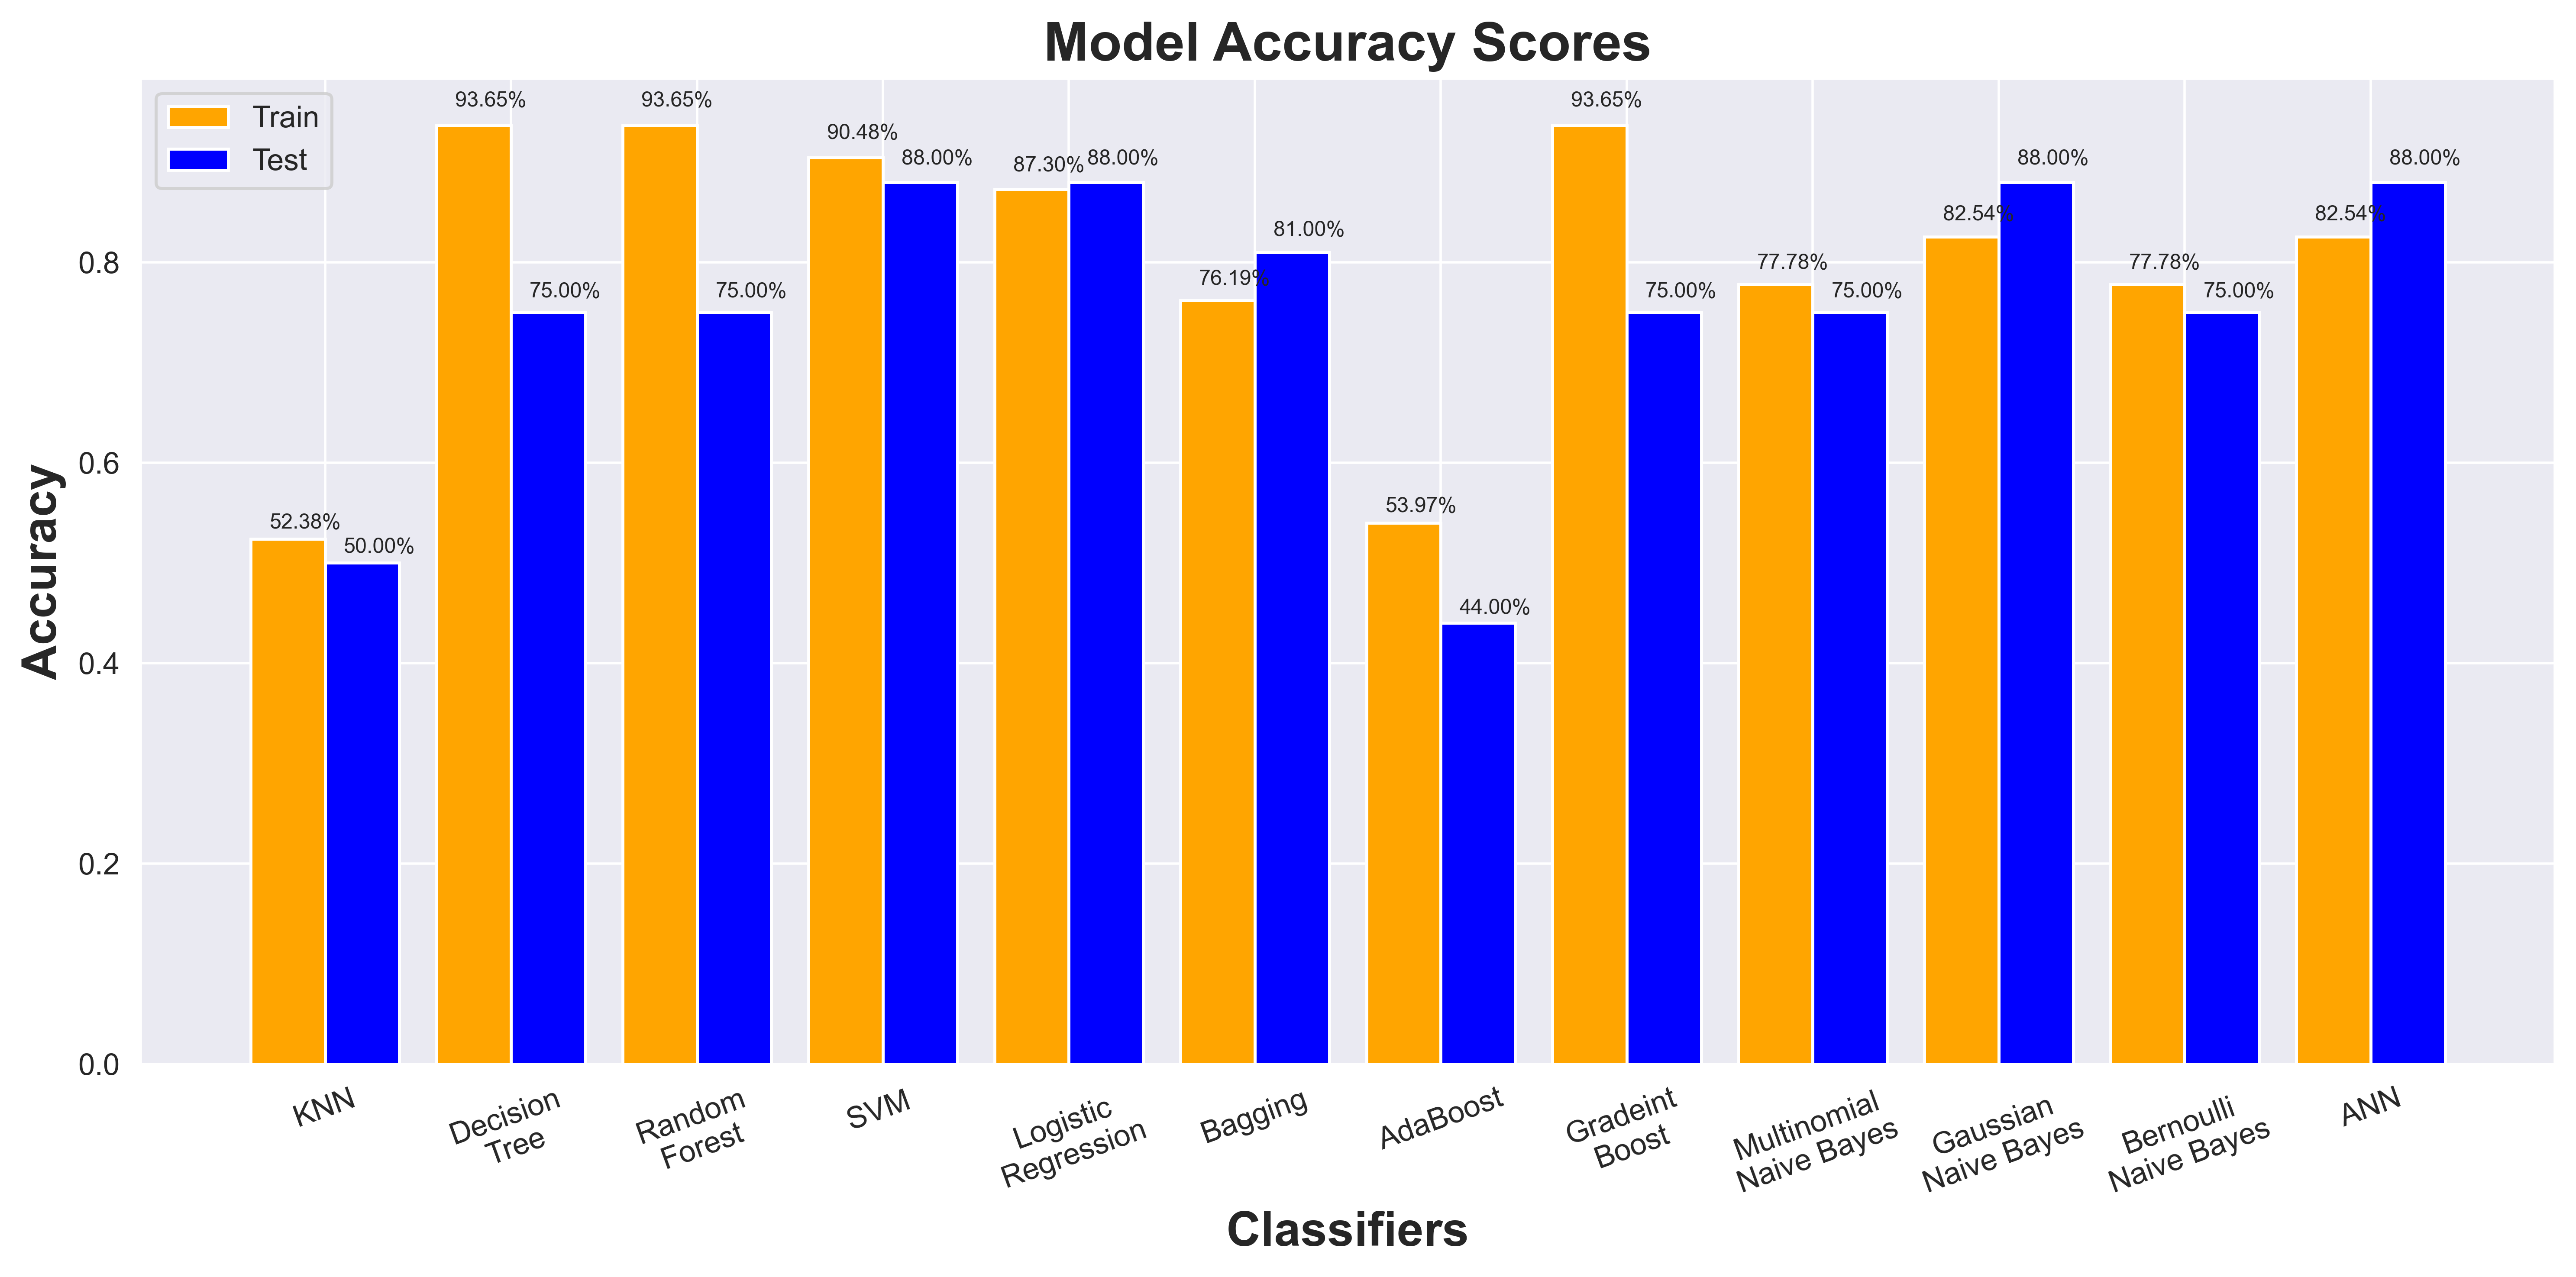

In [26]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision\nTree", "Random\nForest", "SVM ", "Logistic\nRegression", "Bagging", "AdaBoost", "Gradeint\nBoost","Multinomial\nNaive Bayes","Gaussian\nNaive Bayes","Bernoulli\nNaive Bayes","ANN"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 20)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

----------

Here, in the trigram dataset case, we can conclude that the none of the models are giving 100% accuracies. So, the trigram vectorization is not a good choice for this problem.

-------